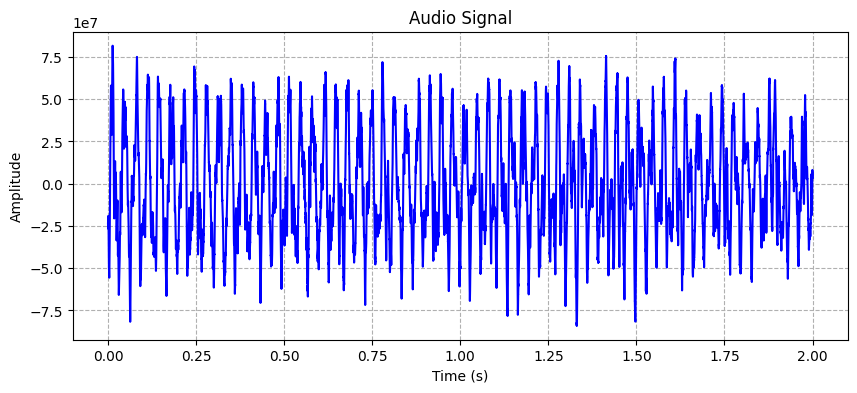

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import csv

aduio_file = f"E:\\Queenless\\20k_audio_splitted_dataset\\train\\Queen\\queen_2.wav"

# Đọc file âm thanh, thay "audio_file.wav" bằng tên file của bạn
sample_rate, data = wavfile.read(aduio_file)

# Nếu file âm thanh có nhiều kênh (stereo), chỉ lấy một kênh (ví dụ: kênh trái)
if data.ndim > 1:
    data = data[:, 0]

# Tạo mảng thời gian dựa trên số mẫu và sample_rate
time = np.linspace(0, len(data) / sample_rate, num=len(data))

# Ghi dữ liệu vào file CSV với cột "Time" và "Amplitude"
with open("data.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Time", "Amplitude"])
    for t, amp in zip(time, data):
        writer.writerow([t, amp])

# Vẽ biểu đồ để kiểm tra dữ liệu
plt.figure(figsize=(10, 4))
plt.plot(time, data, color="blue")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Audio Signal")
plt.grid(True, linestyle='--')
plt.show()


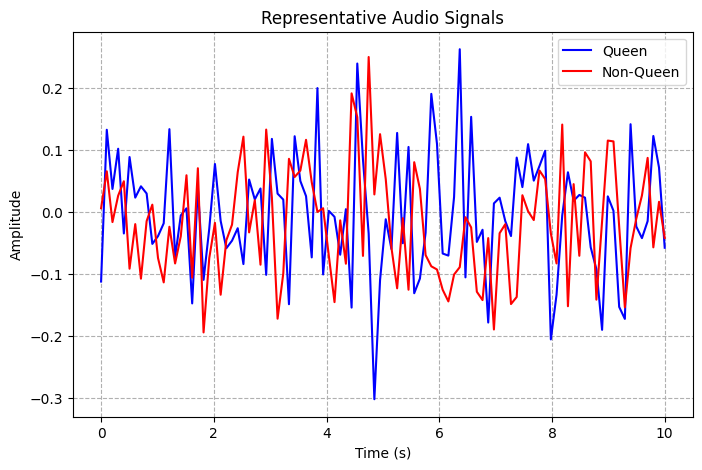

In [9]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Định nghĩa đường dẫn thư mục
queen_folder = r"E:\Queenless\20k_audio_splitted_dataset\val\Queen"
nonqueen_folder = r"E:\Queenless\20k_audio_splitted_dataset\val\NonQueen"

# Hàm đọc tất cả file âm thanh trong thư mục
def load_audio_from_folder(folder_path, max_files=10):
    signals = []
    for idx, filename in enumerate(os.listdir(folder_path)):
        if filename.endswith(".wav") and idx < max_files:  # Giới hạn số file để tăng tốc
            file_path = os.path.join(folder_path, filename)
            y, sr = librosa.load(file_path, sr=None)  # Đọc file với sample rate gốc
            signals.append(y)
    return signals, sr  # Trả về cả sample rate

# Hàm trích xuất tần số chính và biên độ trung bình
def compute_signal_parameters(signals):
    amplitudes = []
    freqs = []
    
    for signal in signals:
        fft_result = np.fft.fft(signal)
        freqs_array = np.fft.fftfreq(len(signal))
        
        # Lấy tần số có biên độ cao nhất
        idx_max = np.argmax(np.abs(fft_result))
        main_freq = abs(freqs_array[idx_max])

        # Tính biên độ trung bình
        mean_amplitude = np.mean(np.abs(signal))
        
        freqs.append(main_freq)
        amplitudes.append(mean_amplitude)
    
    # Trả về giá trị trung bình từ nhiều file
    return np.mean(freqs), np.mean(amplitudes)

# Đọc dữ liệu từ hai thư mục
queen_signals, sr = load_audio_from_folder(queen_folder)
nonqueen_signals, _ = load_audio_from_folder(nonqueen_folder)

# Tính toán thông số
queen_freq, queen_amp = compute_signal_parameters(queen_signals)
nonqueen_freq, nonqueen_amp = compute_signal_parameters(nonqueen_signals)

# Tạo thời gian từ 0 đến 10 giây (100 mẫu)
t = np.linspace(0, 10, 100)

# Tạo sóng sin tổng hợp
y_queen = queen_amp * np.sin(2 * np.pi * queen_freq * t) + 0.1 * np.random.randn(100)
y_non_queen = nonqueen_amp * np.sin(2 * np.pi * nonqueen_freq * t) + 0.1 * np.random.randn(100)

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(t, y_queen, label="Queen", color='blue')
plt.plot(t, y_non_queen, label="Non-Queen", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Representative Audio Signals")
plt.legend()
plt.grid(True, linestyle="dashed")
plt.show()
